In [2]:
# st env

from email.policy import default
import sys, os


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

import seaborn as sns
from optparse import OptionParser
import matplotlib
from matplotlib import rcParams
rcParams['pdf.fonttype'] = 42 #enables correct plotting of text
import math 
from tqdm import tqdm
import scanpy as sc
import pandas as pd

from statannotations.Annotator import Annotator


# 503D

In [3]:
os.chdir("/hsfscqjf1/ST_CQ/P24Z32300N0020/hemingmin/bom/10.sc_merged1/results/17_st/bin20_L503/")
anno = 'cell2loc_anno'
adata_vis=sc.read_h5ad("./cellNeighbor/out.h5ad")
adata_vis


/hsfscqjf2/ST_CQ/Reference/software/envs/st/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/hsfscqjf2/ST_CQ/Reference/software/envs/st/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


AnnData object with n_obs × n_vars = 31254 × 8056
    obs: 'x', 'y', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', '_indices', '_scvi_batch', '_scvi_labels', 'Apoptosis', 'Axon_development', 'Cell_morphogenesis', 'Ciliated_cell', 'Cuticle_1', 'Cuticle_2', 'Cuticle_3', 'Epithelial_1', 'Epithelial_2', 'Epithelial_3', 'Immune', 'Metabolic_process', 'Others', 'cell2loc_anno', 'cell_neighbor'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'MT_gene'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'cell2loc_anno_colors', 'leiden', 'log1p', 'mod', 'neighbors', 'pca', 'rank_genes_groups_leiden', 'tsne', 'umap'
    obsm: 'MT', 'X_pca', 'X_tsne', 'X_umap', 'means_cell_abundance_w_sf', 'q05_cell_abundance_w_sf', 'q95_cell_abundance_w_sf', 'spatial', 'stds_cell_abundance_w_sf'
    obsp: 'connectivities', 'distances'

In [4]:
choose_celltype=['Cell_morphogenesis', 'Epithelial_1', 'Epithelial_2', 'Epithelial_3','Cuticle_1', 'Cuticle_2','Cuticle_3',
                'Immune','Apoptosis', 'Metabolic_process','Axon_development', 'Ciliated_cell']
adata=adata_vis[adata_vis.obs["cell2loc_anno"].isin(choose_celltype)]

In [5]:
# print(adata_vis.obs['cell2loc_anno'].dtype)
adata.obs['cell2loc_anno'] = pd.Categorical(
    adata.obs['cell2loc_anno'], 
    categories=choose_celltype 
)

/tmp/450863.1.report.q/ipykernel_71519/47376762.py:2: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['cell2loc_anno'] = pd.Categorical(


In [6]:
sc.pp.scale(adata)

In [7]:
# celltype marekrs
marker_genes_dict = {
    'Wm':['LOC101743456','LOC692894','LOC101736196','serpin-10'],#,'serpin−10'
    'E1':['LOC101740099','LOC101739863','CPH3','LOC101747010','Tinag'],
    'E2': [ 'Lix1','LOC101736196','LOC101740925'] ,#',,'FMO3''LOC101737511'
    'E3': ['LOC101747029','LOC101747029'] ,
     'C1':['fmxg9M19','CPR42','CPR46'],#'LOC110385711',
    'C2': [ 'LOC101746215','LOC101736156','LOC101740121','LOC105842386','LOC101741469'] ,
    'C3':['LOC110386217','Notch','LOC119630575'],#'CPH32',,'LOC101745386''LOC101745531','LOC101745678',
    'Im':['LOC101737743','LOC101736559','LOC110386081','LOC119628986','Pp'],
    'Ap': ['CLIP3','LOC692743','LOC101735635'],#'CCE−un1',,'Let−2'
    'Mp': [ 'LOC101741484','LOC101735390','LOC101746296','LOC101743328','LOC101742732'],
    'Ad':['AK','LOC692904','LOC101735334','LOC692416'],#'LOC101740249',
     'Cc':['LOC101744170','LOC100529232','LOC101743877'] #'LOC101738011',,'LOC10174197','LOC101744418','LOC105842181'
}

/hsfscqjf2/ST_CQ/Reference/software/envs/st/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


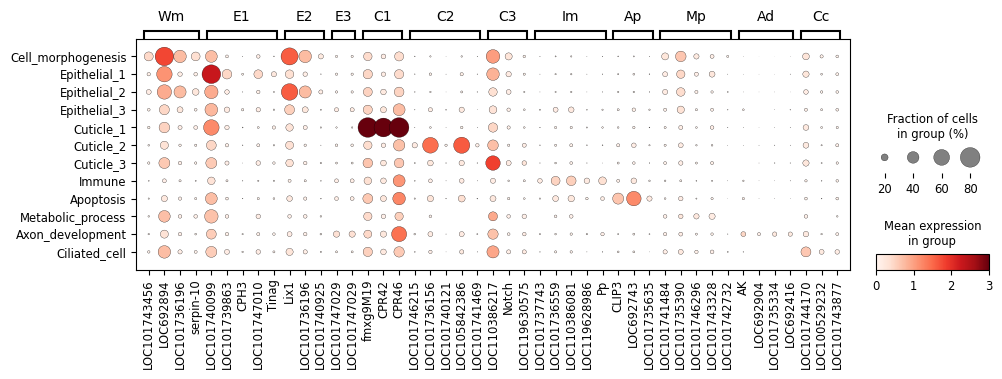

In [193]:
# celltype matkers
ax=sc.pl.dotplot(adata, marker_genes_dict, 'cell2loc_anno', dendrogram=False,
                figsize=[11,3],dot_max=0.8,
                 dot_min=0,   
                 # vmin=-1,
                 vmax=3,      
                 # cmap='RdBu_r',
                save='markers_anno.pdf')

## celltype

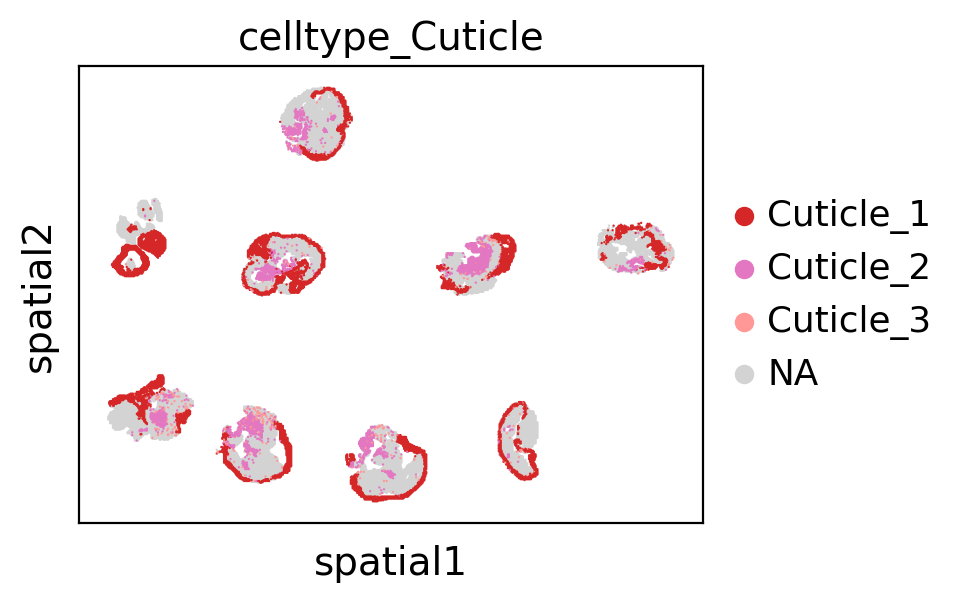

In [8]:
sc.settings.set_figure_params(dpi=100, facecolor='white')
adata.obs['celltype_Cuticle']=np.nan
adata.obs.loc[adata.obs['cell2loc_anno']=='Cuticle_1','celltype_Cuticle']='Cuticle_1'
adata.obs.loc[adata.obs['cell2loc_anno']=='Cuticle_2','celltype_Cuticle']='Cuticle_2'
adata.obs.loc[adata.obs['cell2loc_anno']=='Cuticle_3','celltype_Cuticle']='Cuticle_3'


color_anno_cuticle={
"Cuticle_1":'#d62728',
"Cuticle_2":'#e377c2',
"Cuticle_3":'#ff9896',
}

sc.pl.spatial(adata,color=["celltype_Cuticle"],img_key="hires",
              palette=color_anno_cuticle,
              spot_size=50,save='L503_celltype_Cuticle.pdf')

In [11]:
adata.obs["celltype_Cuticle"].value_counts()

Cuticle_1    7321
Cuticle_2    2860
Cuticle_3     449
Name: celltype_Cuticle, dtype: int64

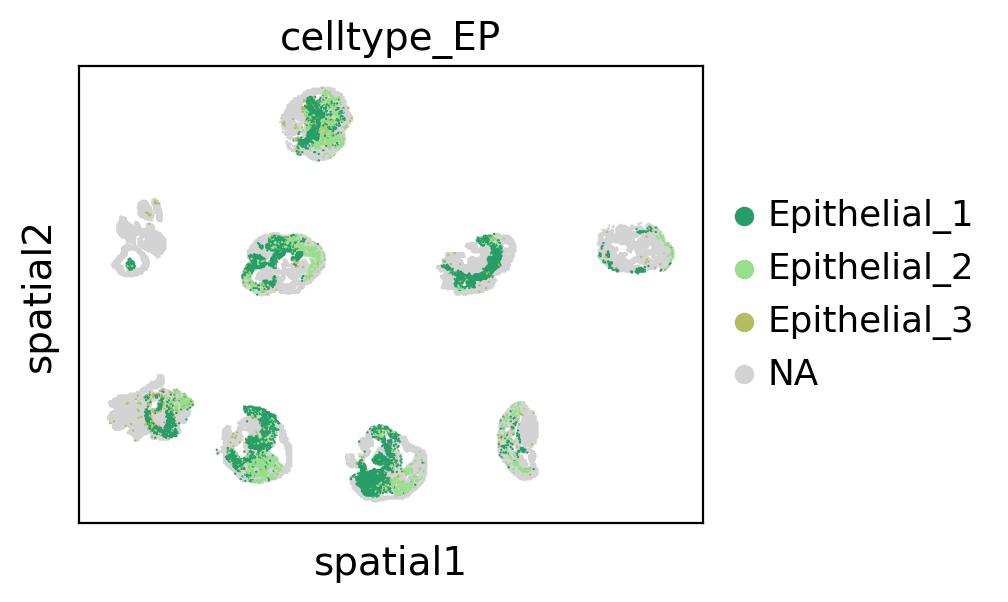

In [12]:
sc.settings.set_figure_params(dpi=100, facecolor='white')
adata.obs['celltype_EP']=np.nan
adata.obs.loc[adata.obs['cell2loc_anno']=='Epithelial_1','celltype_EP']='Epithelial_1'
adata.obs.loc[adata.obs['cell2loc_anno']=='Epithelial_2','celltype_EP']='Epithelial_2'
adata.obs.loc[adata.obs['cell2loc_anno']=='Epithelial_3','celltype_EP']='Epithelial_3'

color_anno_ep={
# "Cell_morphogenesis":'#1f77b4',
"Epithelial_1":'#279e68',
"Epithelial_2":'#98df8a',
"Epithelial_3":'#b5bd61',
# "Cuticle_1":'#d62728',
# "Cuticle_2":'#e377c2',
# "Cuticle_3":'#ff9896',
}
sc.pl.spatial(adata,color=["celltype_EP"],img_key="hires",
              palette=color_anno_ep,
              spot_size=50,save='L503_celltype_EP.pdf')

In [13]:
adata.obs["celltype_EP"].value_counts()

Epithelial_1    4829
Epithelial_2    2167
Epithelial_3     459
Name: celltype_EP, dtype: int64

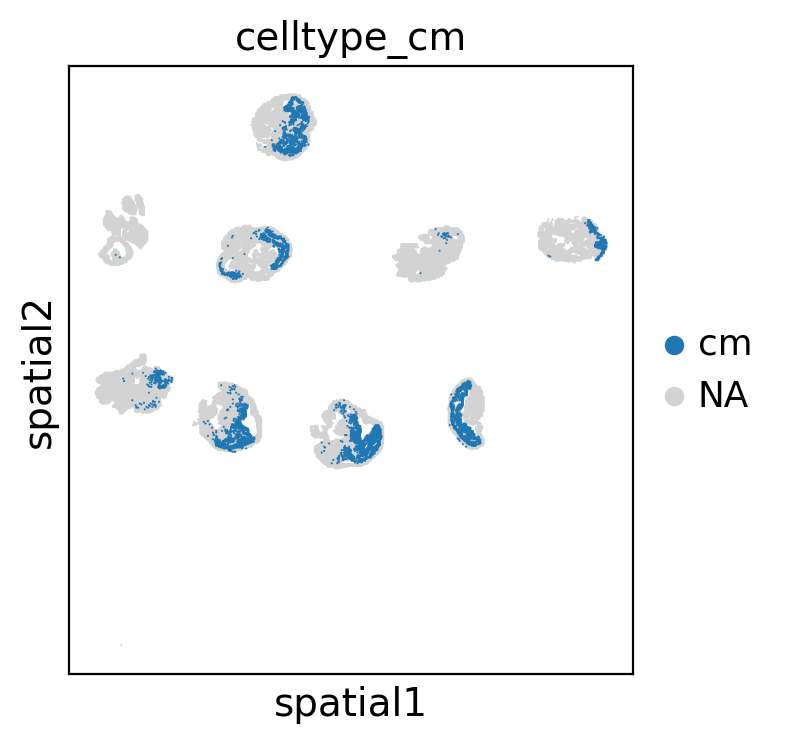

In [37]:
sc.settings.set_figure_params(dpi=100, facecolor='white')
adata.obs['celltype_cm']=np.nan
adata.obs.loc[adata.obs['cell2loc_anno']=='Cell_morphogenesis','celltype_cm']='cm'


color_anno_cm={
"cm":'#1f77b4'
}

sc.pl.spatial(adata,color=["celltype_cm"],img_key="hires",
               palette=color_anno_cm,
              spot_size=50,save='L503_celltype_cm.pdf')

In [14]:
adata.write_h5ad("plot.h5ad")

In [38]:
matrix=adata.to_df()
meta_data=adata.obs

In [40]:
matrix.to_csv('count.csv',index=True)
meta_data.to_csv('meta_data.csv',index=True)

In [16]:
color_anno={
"Cell_morphogenesis":'#1f77b4',
"Epithelial_1":'#279e68',
"Epithelial_2":'#98df8a',
"Epithelial_3":'#b5bd61',
"Cuticle_1":'#d62728',
"Cuticle_2":'#e377c2',
"Cuticle_3":'#ff9896',
"Immune":'#f7b6d2',
"Apoptosis":'#aa40fc',
"Metabolic_process":'#c49c94',
"Axon_development":'#ffbb78',
"Ciliated_cell":'#ff7f0e'
}

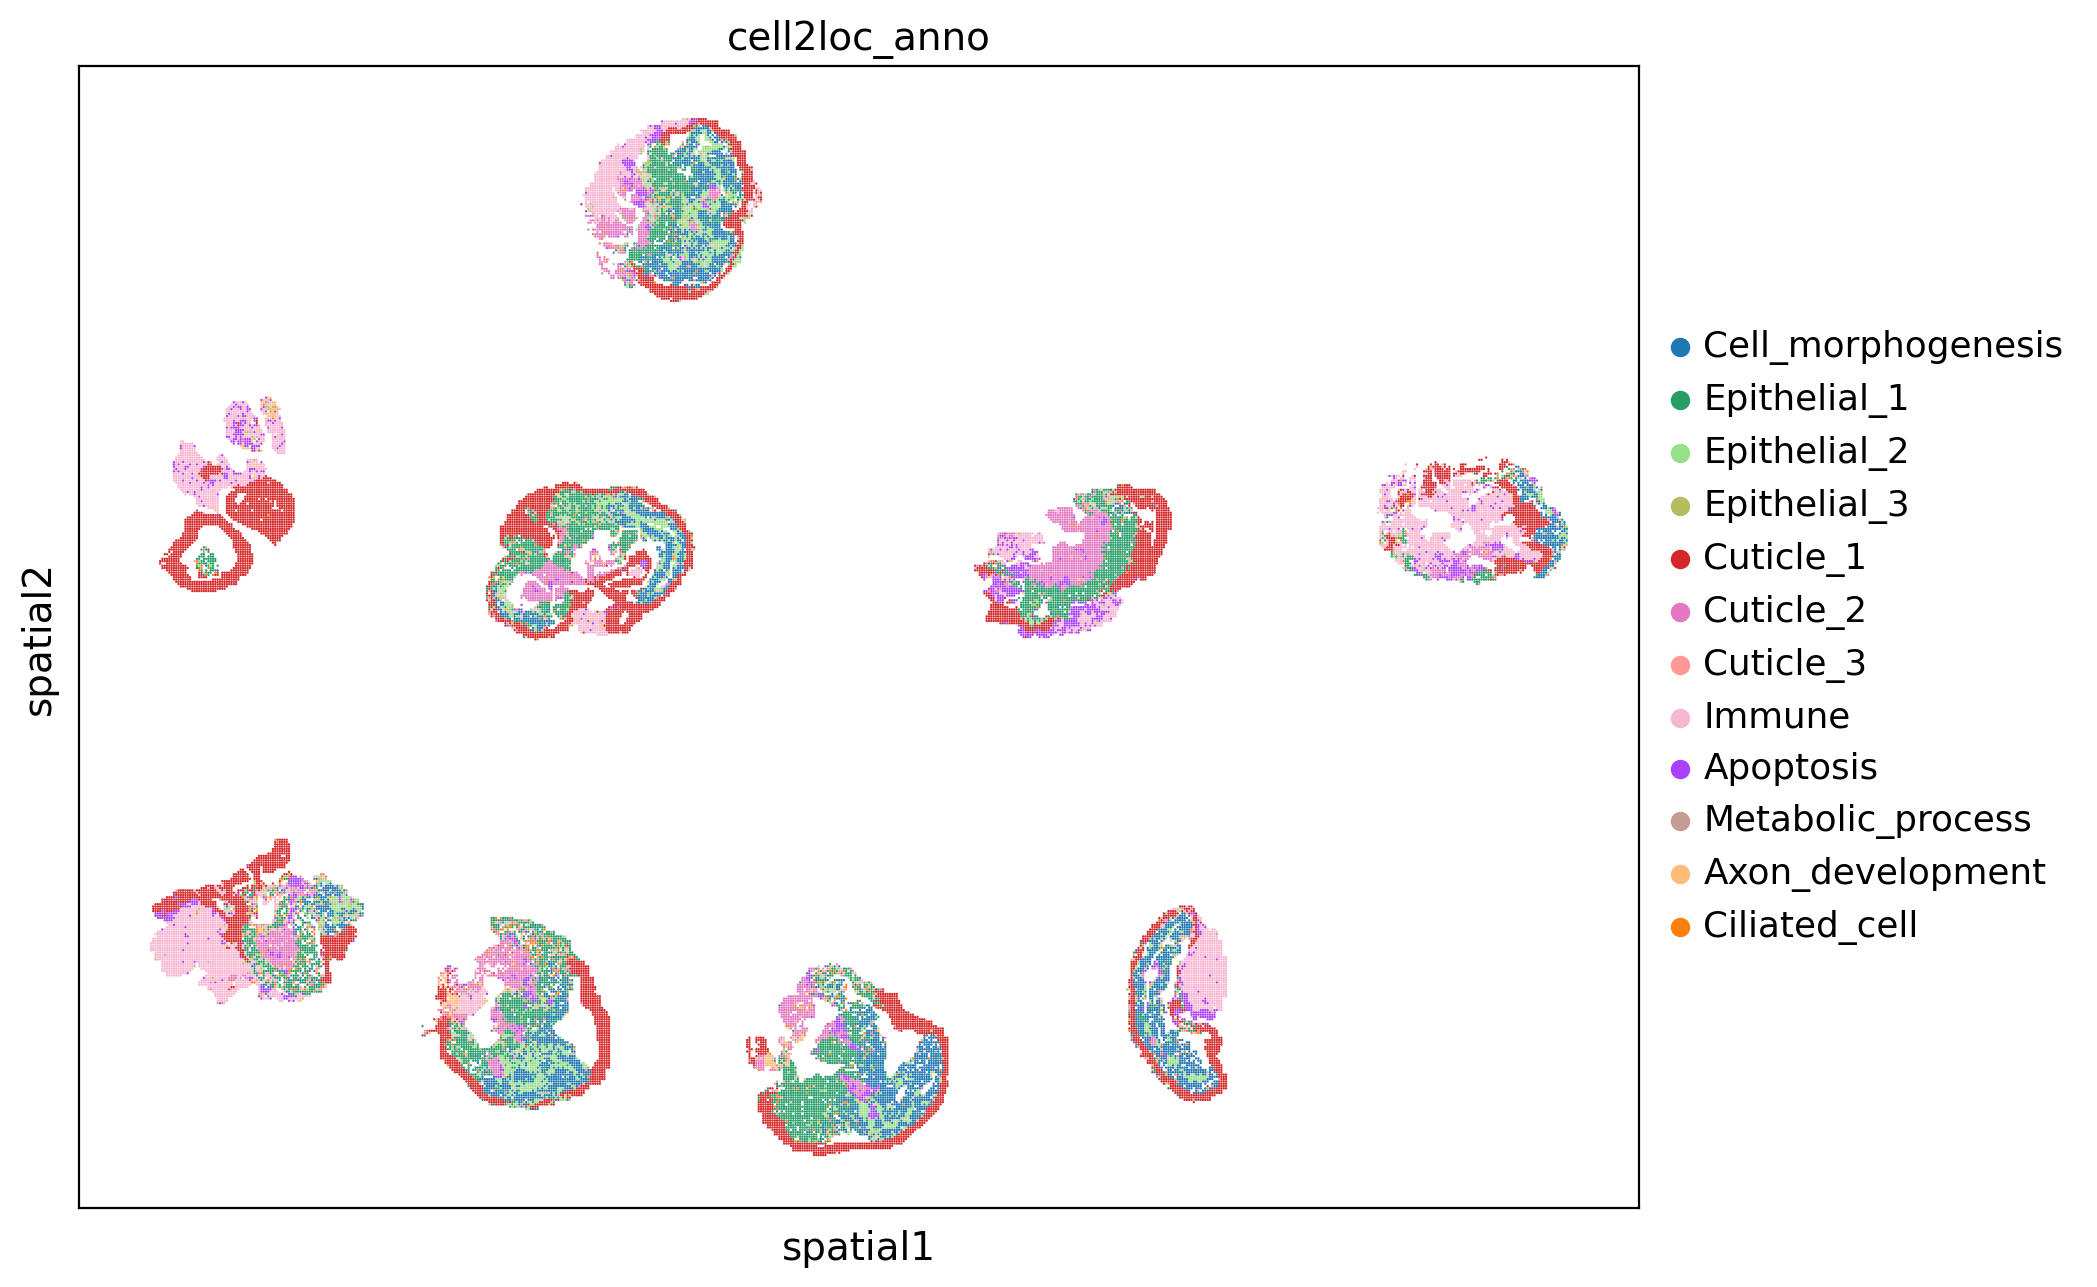

In [17]:
rcParams['figure.figsize'] = 10, 10
sc.pl.spatial(adata, img_key="hires", 
              color='cell2loc_anno', 
              palette=color_anno,
              spot_size=50,size=0.4,save=f"L503_{anno}.pdf")
#Diameter of spot (in coordinate space) for each point,spot_size
#Point size,size

In [43]:
adata

AnnData object with n_obs × n_vars = 31254 × 8056
    obs: 'x', 'y', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', '_indices', '_scvi_batch', '_scvi_labels', 'Apoptosis', 'Axon_development', 'Cell_morphogenesis', 'Ciliated_cell', 'Cuticle_1', 'Cuticle_2', 'Cuticle_3', 'Epithelial_1', 'Epithelial_2', 'Epithelial_3', 'Immune', 'Metabolic_process', 'Others', 'cell2loc_anno', 'cell_neighbor', 'celltype_Cuticle', 'celltype_EP', 'celltype_cm'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'MT_gene'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'cell2loc_anno_colors', 'leiden', 'log1p', 'mod', 'neighbors', 'pca', 'rank_genes_groups_leiden', 'tsne', 'umap', 'dendrogram_cell2loc_anno', 'celltype_Cuticle_colors', 'celltype_EP_colors', 'celltype_cm_colors'
    obsm: 'MT', 'X_pca', 'X_tsne', 'X_umap', 'means_cell_abundance_w_sf', 'q05_cell_abundance_w_sf', 'q95_cell_abundance_w_sf', 'spatial', 's

In [44]:
cellsCount = adata.obs['cell2loc_anno'].value_counts()
cellsRate = cellsCount/cellsCount.sum()*100
cellsdf = pd.concat([cellsCount, cellsRate], axis=1)
cellsdf.columns = ['count', 'rate']
cellsdf.to_csv(f"{anno}_cell_count.tsv", sep="\t")

In [48]:
plt.figure(figsize=(12, 10))
cellsdf['count'].plot(kind = 'barh')
i = 0
sum = cellsdf['count'].sum()
for _, v in cellsdf['rate'].items():
    plt.text(sum*(v+2)/100, i, '%.2f' % v, ha='center', va='bottom', fontsize=11)
    i+=1
plt.savefig(f"L503_{anno}_cell_count.pdf")
plt.clf()

<Figure size 1200x1000 with 0 Axes>

In [46]:

plotcol = 4
cells = adata.obs[anno].unique()
# cells=['Cell_junction', 'Cell_morphogenesis','Cuticle', 'Cuticle_early', 'Cuticle_late',
#                        'Epithelial_1',
# 'Epithelial_2',
# 'Epithelial_3',
# 'Eukaryocyte',
# 'Immune',
#  'Metabolic_process',
#   'Others', 'Phagocytes', 'Phosphorylation']
plotrow = math.ceil(len(cells)/plotcol)
figSize = (16, plotrow*4)
# cells

In [89]:
fig = plt.figure(figsize=figSize,dpi=500)
for j in tqdm(range(len(cells))):
    cell = cells[j]
    i = j+1
    row = int(i/plotcol)
    col = i - row*plotcol
    ax = plt.subplot(plotrow, plotcol, i)
    sc.pl.spatial(adata, img_key="hires", color=anno,  palette=color_anno,
                  groups = [cell], spot_size=50,size=0.6,show=False, ax = ax, title ="{0} ({1})".format(cell, cellsCount.loc[cell]), legend_loc=None)
    ax.set_xlabel("")
    ax.set_ylabel("")
plt.savefig(f"L503_{anno}_split.pdf")
plt.clf()

100%|██████████| 13/13 [00:34<00:00,  2.64s/it]


<Figure size 8000x8000 with 0 Axes>

# 502D

In [18]:
os.chdir("/hsfscqjf1/ST_CQ/P24Z32300N0020/hemingmin/bom/10.sc_merged1/results/17_st/bin20_L502")

anno = 'cell2loc_anno'
adata_vis=sc.read_h5ad("./cellNeighbor/out.h5ad")
adata_vis

/hsfscqjf2/ST_CQ/Reference/software/envs/st/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/hsfscqjf2/ST_CQ/Reference/software/envs/st/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


AnnData object with n_obs × n_vars = 48137 × 8304
    obs: 'x', 'y', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', '_indices', '_scvi_batch', '_scvi_labels', 'Apoptosis', 'Axon_development', 'Cell_morphogenesis', 'Ciliated_cell', 'Cuticle_1', 'Cuticle_2', 'Cuticle_3', 'Epithelial_1', 'Epithelial_2', 'Epithelial_3', 'Immune', 'Metabolic_process', 'Others', 'cell2loc_anno', 'cell_neighbor'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'MT_gene'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'cell2loc_anno_colors', 'leiden', 'log1p', 'mod', 'neighbors', 'pca', 'rank_genes_groups_leiden', 'tsne', 'umap'
    obsm: 'MT', 'X_pca', 'X_tsne', 'X_umap', 'means_cell_abundance_w_sf', 'q05_cell_abundance_w_sf', 'q95_cell_abundance_w_sf', 'spatial', 'stds_cell_abundance_w_sf'
    obsp: 'connectivities', 'distances'

In [19]:
choose_celltype=['Cell_morphogenesis', 'Epithelial_1', 'Epithelial_2', 'Epithelial_3','Cuticle_1', 'Cuticle_2','Cuticle_3',
                'Immune','Apoptosis', 'Metabolic_process','Axon_development', 'Ciliated_cell']
adata=adata_vis[adata_vis.obs["cell2loc_anno"].isin(choose_celltype)]

In [20]:
# print(adata_vis.obs['cell2loc_anno'].dtype)
adata.obs['cell2loc_anno'] = pd.Categorical(
    adata.obs['cell2loc_anno'], 
    categories=choose_celltype 
)

/tmp/450863.1.report.q/ipykernel_71519/47376762.py:2: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['cell2loc_anno'] = pd.Categorical(


## celltypes

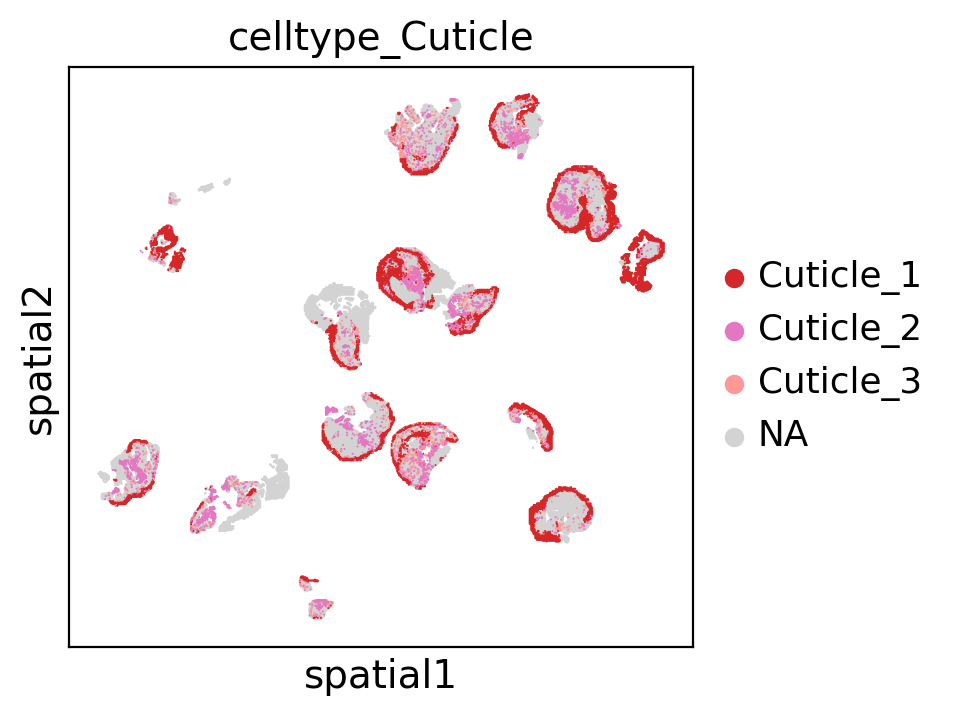

In [72]:
sc.settings.set_figure_params(dpi=100, facecolor='white')
adata.obs['celltype_Cuticle']=np.nan
adata.obs.loc[adata.obs['cell2loc_anno']=='Cuticle_1','celltype_Cuticle']='Cuticle_1'
adata.obs.loc[adata.obs['cell2loc_anno']=='Cuticle_2','celltype_Cuticle']='Cuticle_2'
adata.obs.loc[adata.obs['cell2loc_anno']=='Cuticle_3','celltype_Cuticle']='Cuticle_3'


color_anno_cuticle={
"Cuticle_1":'#d62728',
"Cuticle_2":'#e377c2',
"Cuticle_3":'#ff9896',
}

sc.pl.spatial(adata,color=["celltype_Cuticle"],img_key="hires",
              palette=color_anno_cuticle,
              spot_size=50,save='L502_celltype_Cuticle.pdf')

In [73]:
adata.obs["celltype_Cuticle"].value_counts()

celltype_Cuticle
Cuticle_1    9285
Cuticle_2    3661
Cuticle_3    1584
Name: count, dtype: int64

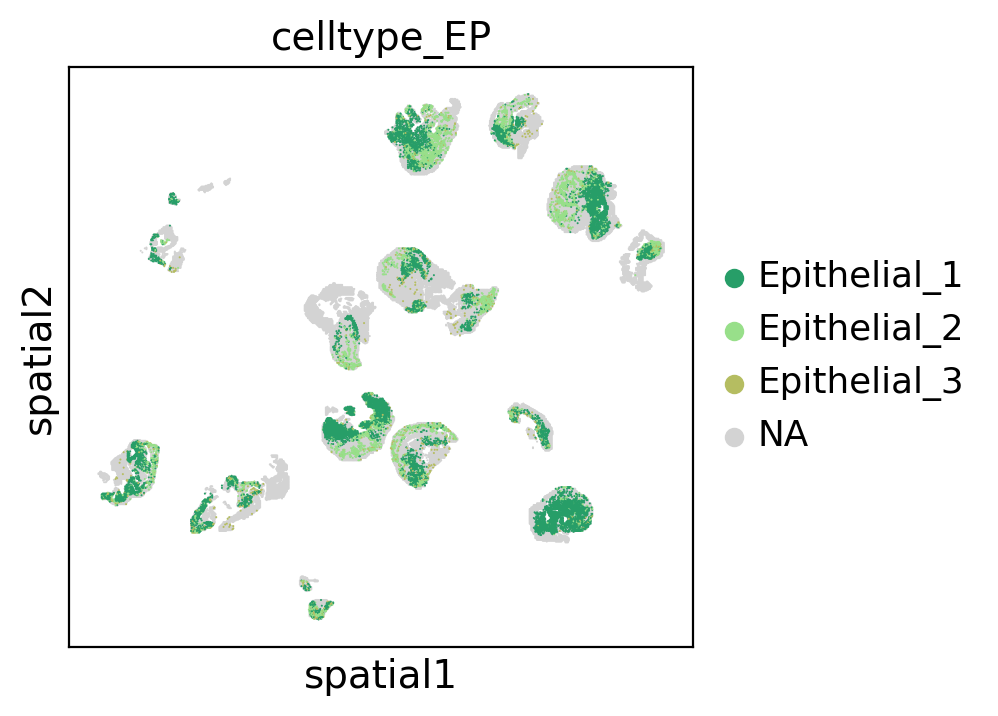

In [74]:
sc.settings.set_figure_params(dpi=100, facecolor='white')
adata.obs['celltype_EP']=np.nan
adata.obs.loc[adata.obs['cell2loc_anno']=='Epithelial_1','celltype_EP']='Epithelial_1'
adata.obs.loc[adata.obs['cell2loc_anno']=='Epithelial_2','celltype_EP']='Epithelial_2'
adata.obs.loc[adata.obs['cell2loc_anno']=='Epithelial_3','celltype_EP']='Epithelial_3'

color_anno_ep={
# "Cell_morphogenesis":'#1f77b4',
"Epithelial_1":'#279e68',
"Epithelial_2":'#98df8a',
"Epithelial_3":'#b5bd61',
# "Cuticle_1":'#d62728',
# "Cuticle_2":'#e377c2',
# "Cuticle_3":'#ff9896',
}
sc.pl.spatial(adata,color=["celltype_EP"],img_key="hires",
              palette=color_anno_ep,
              spot_size=50,save='L502_celltype_EP.pdf')

In [75]:
adata.obs["celltype_EP"].value_counts()


celltype_EP
Epithelial_1    8532
Epithelial_2    3758
Epithelial_3     922
Name: count, dtype: int64

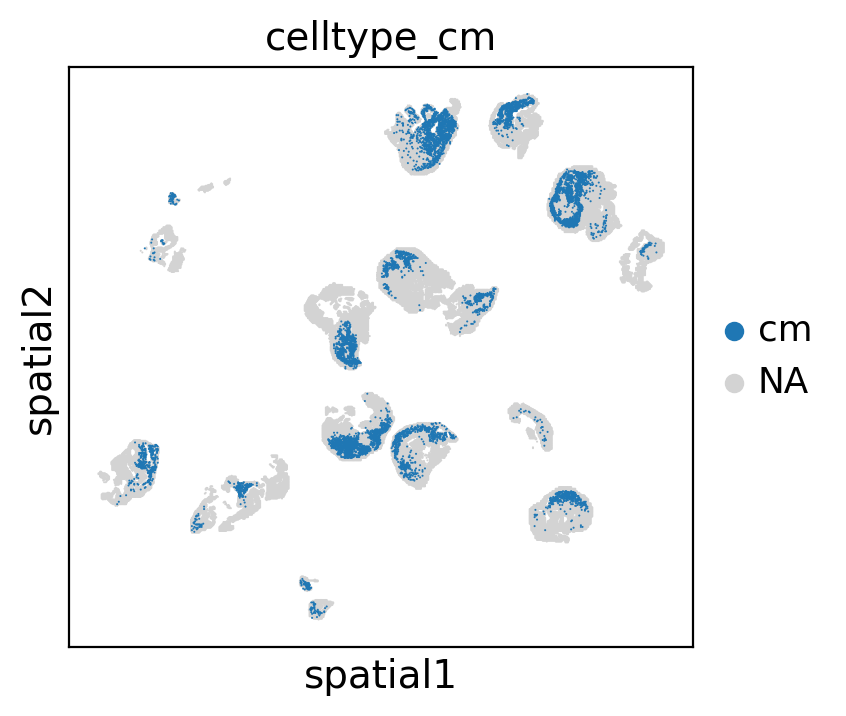

In [76]:
sc.settings.set_figure_params(dpi=100, facecolor='white')
adata.obs['celltype_cm']=np.nan
adata.obs.loc[adata.obs['cell2loc_anno']=='Cell_morphogenesis','celltype_cm']='cm'


color_anno_cm={
"cm":'#1f77b4'
}

sc.pl.spatial(adata,color=["celltype_cm"],img_key="hires",
               palette=color_anno_cm,
              spot_size=50,save='L502_celltype_cm.pdf')

In [21]:
color_anno={
"Cell_morphogenesis":'#1f77b4',
"Epithelial_1":'#279e68',
"Epithelial_2":'#98df8a',
"Epithelial_3":'#b5bd61',
"Cuticle_1":'#d62728',
"Cuticle_2":'#e377c2',
"Cuticle_3":'#ff9896',
"Immune":'#f7b6d2',
"Apoptosis":'#aa40fc',
"Metabolic_process":'#c49c94',
"Axon_development":'#ffbb78',
"Ciliated_cell":'#ff7f0e'
}

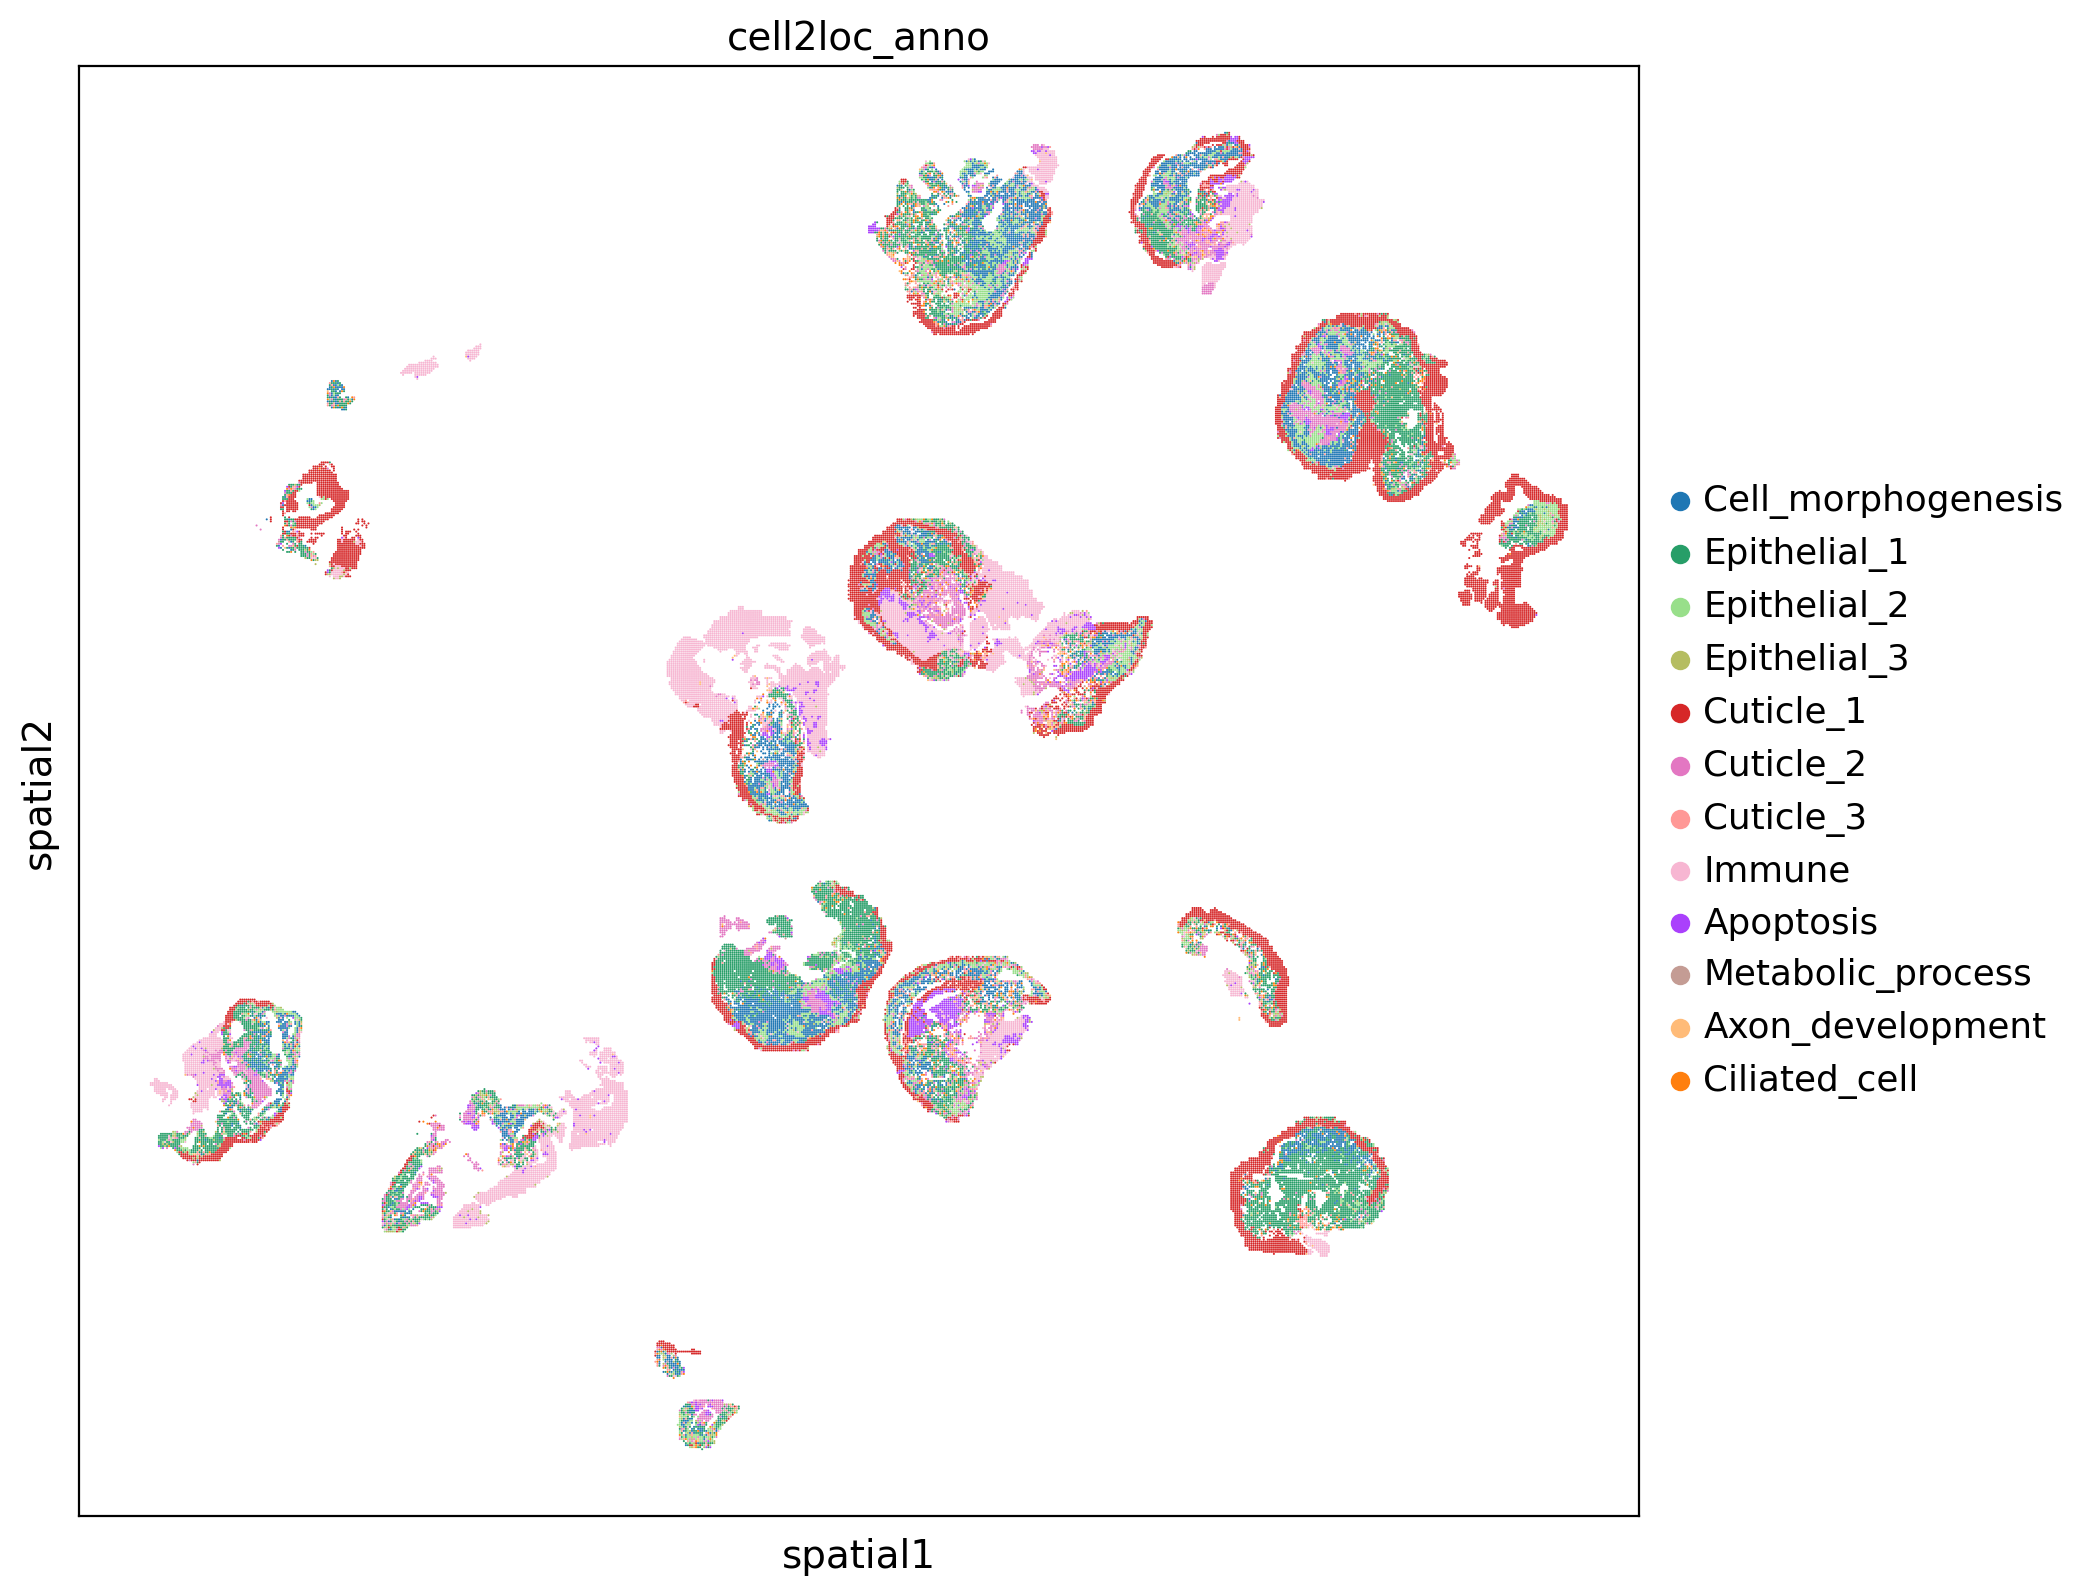

In [22]:
rcParams['figure.figsize'] = 10, 10
sc.pl.spatial(adata, img_key="hires",
              color=['cell2loc_anno'], 
              palette=color_anno,
              spot_size=50,
              size=0.4 ,save=f"L502_{anno}.pdf")

In [42]:
adata.write_h5ad("plot.h5ad")

In [79]:
matrix=adata.to_df()
meta_data=adata.obs

In [81]:
matrix.to_csv('count.csv',index=True)
meta_data.to_csv('meta_data.csv',index=True)

In [82]:
adata

AnnData object with n_obs × n_vars = 48137 × 8304
    obs: 'x', 'y', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', '_indices', '_scvi_batch', '_scvi_labels', 'Apoptosis', 'Axon_development', 'Cell_morphogenesis', 'Ciliated_cell', 'Cuticle_1', 'Cuticle_2', 'Cuticle_3', 'Epithelial_1', 'Epithelial_2', 'Epithelial_3', 'Immune', 'Metabolic_process', 'Others', 'cell2loc_anno', 'cell_neighbor', 'celltype_Cuticle', 'celltype_EP', 'celltype_cm'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'MT_gene'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'cell2loc_anno_colors', 'leiden', 'log1p', 'mod', 'neighbors', 'pca', 'rank_genes_groups_leiden', 'tsne', 'umap', 'dendrogram_cell2loc_anno', 'celltype_Cuticle_colors', 'celltype_EP_colors', 'celltype_cm_colors'
    obsm: 'MT', 'X_pca', 'X_tsne', 'X_umap', 'means_cell_abundance_w_sf', 'q05_cell_abundance_w_sf', 'q95_cell_abundance_w_sf', 'spatial', 's

In [83]:
cellsCount = adata.obs['cell2loc_anno'].value_counts()
cellsRate = cellsCount/cellsCount.sum()*100
cellsdf = pd.concat([cellsCount, cellsRate], axis=1)
cellsdf.columns = ['count', 'rate']
cellsdf.to_csv(f"{anno}_cell_count.tsv", sep="\t")

In [84]:
plt.figure(figsize=(12, 10))
cellsdf['count'].plot(kind = 'barh')
i = 0
sum = cellsdf['count'].sum()
for _, v in cellsdf['rate'].items():
    plt.text(sum*(v+2)/100, i, '%.2f' % v, ha='center', va='bottom', fontsize=11)
    i+=1
plt.savefig(f"L502_{anno}_cell_count.pdf")
plt.clf()

<Figure size 1200x1000 with 0 Axes>

In [85]:

plotcol = 4
cells = adata.obs[anno].unique()
# cells=['Cell_junction', 'Cuticle', 'Cuticle_early', 'Cuticle_late',
#                        'Epithelial_cell',
# 'Epithelial_tissue',
# 'Epithelial_tissue_early',
# 'Eukaryocyte',
# 'Immune',
#  'Metabolic_process',
#   'Others', 'Phagocytes', 'Phosphorylation', 'Plasma_cell']
# cells=['Cell_junction', 'Cell_morphogenesis','Cuticle', 'Cuticle_early', 'Cuticle_late',
#                        'Epithelial_1',
# 'Epithelial_2',
# 'Epithelial_3',
# 'Eukaryocyte',
# 'Immune',
#  'Metabolic_process',
#   'Others', 'Phagocytes', 'Phosphorylation']

plotrow = math.ceil(len(cells)/plotcol)
figSize = (16, plotrow*4)
# cells

In [86]:
fig = plt.figure(figsize=figSize,dpi=100)
for j in tqdm(range(len(cells))):
    cell = cells[j]
    i = j+1
    row = int(i/plotcol)
    col = i - row*plotcol
    ax = plt.subplot(plotrow, plotcol, i)
    sc.pl.spatial(adata, img_key="hires", color=anno,  palette=color_anno,groups = [cell], spot_size=50,size=0.6,show=False, ax = ax, title ="{0} ({1})".format(cell, cellsCount.loc[cell]), legend_loc=None)
    ax.set_xlabel("")
    ax.set_ylabel("")
plt.savefig(f"L502_{anno}_split.pdf")
plt.clf()

100%|██████████| 13/13 [00:50<00:00,  3.91s/it]


<Figure size 1600x1600 with 0 Axes>

# WD2-2D

In [23]:
os.chdir("/hsfscqjf1/ST_CQ/P24Z32300N0020/hemingmin/bom/10.sc_merged1/results/17_st/bin20_WD2/")
anno = 'cell2loc_anno'
adata_vis=sc.read_h5ad("./cellNeighbor/out.h5ad")
adata_vis

/hsfscqjf2/ST_CQ/Reference/software/envs/st/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/hsfscqjf2/ST_CQ/Reference/software/envs/st/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


AnnData object with n_obs × n_vars = 24157 × 7274
    obs: 'x', 'y', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', '_indices', '_scvi_batch', '_scvi_labels', 'Apoptosis', 'Axon_development', 'Cell_morphogenesis', 'Ciliated_cell', 'Cuticle_1', 'Cuticle_2', 'Cuticle_3', 'Epithelial_1', 'Epithelial_2', 'Epithelial_3', 'Immune', 'Metabolic_process', 'Others', 'cell2loc_anno', 'cell_neighbor'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'MT_gene'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'cell2loc_anno_colors', 'leiden', 'log1p', 'mod', 'neighbors', 'pca', 'rank_genes_groups_leiden', 'tsne', 'umap'
    obsm: 'MT', 'X_pca', 'X_tsne', 'X_umap', 'means_cell_abundance_w_sf', 'q05_cell_abundance_w_sf', 'q95_cell_abundance_w_sf', 'spatial', 'stds_cell_abundance_w_sf'
    obsp: 'connectivities', 'distances'

In [24]:
choose_celltype=['Cell_morphogenesis', 'Epithelial_1', 'Epithelial_2', 'Epithelial_3','Cuticle_1', 'Cuticle_2','Cuticle_3',
                'Immune','Apoptosis', 'Metabolic_process','Axon_development', 'Ciliated_cell']
adata=adata_vis[adata_vis.obs["cell2loc_anno"].isin(choose_celltype)]

In [25]:
# print(adata_vis.obs['cell2loc_anno'].dtype)
adata.obs['cell2loc_anno'] = pd.Categorical(
    adata.obs['cell2loc_anno'], 
    categories=choose_celltype 
)

/tmp/450863.1.report.q/ipykernel_71519/47376762.py:2: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['cell2loc_anno'] = pd.Categorical(


## celltype

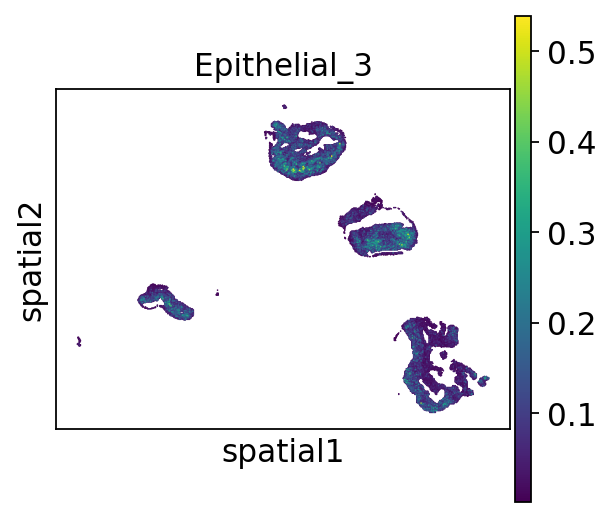

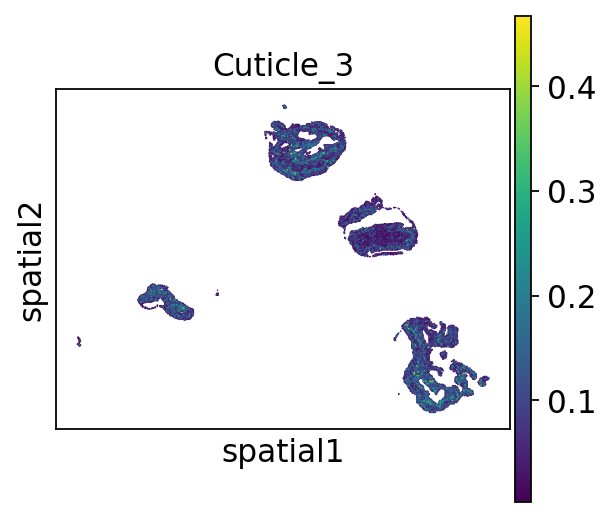

In [96]:
sc.pl.spatial(adata, color=['Epithelial_3'],title=['Epithelial_3'],spot_size=50,save='Epithelial_3_cell2loc.pdf')
sc.pl.spatial(adata, color=['Cuticle_3'],title=['Cuticle_3'],spot_size=50,save='Cuticle_cell2loc.pdf')

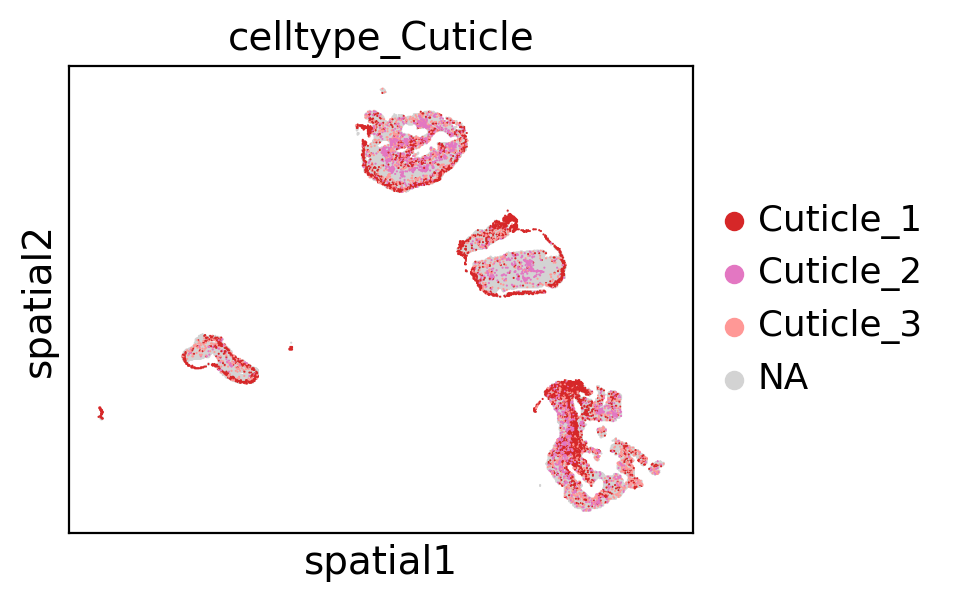

In [97]:
sc.settings.set_figure_params(dpi=100, facecolor='white')
adata.obs['celltype_Cuticle']=np.nan
adata.obs.loc[adata.obs['cell2loc_anno']=='Cuticle_1','celltype_Cuticle']='Cuticle_1'
adata.obs.loc[adata.obs['cell2loc_anno']=='Cuticle_2','celltype_Cuticle']='Cuticle_2'
adata.obs.loc[adata.obs['cell2loc_anno']=='Cuticle_3','celltype_Cuticle']='Cuticle_3'


color_anno_cuticle={
"Cuticle_1":'#d62728',
"Cuticle_2":'#e377c2',
"Cuticle_3":'#ff9896',
}

sc.pl.spatial(adata,color=["celltype_Cuticle"],img_key="hires",
              palette=color_anno_cuticle,
              spot_size=50,save='WD2_celltype_Cuticle.pdf')

In [98]:
adata.obs["celltype_Cuticle"].value_counts()

celltype_Cuticle
Cuticle_1    3282
Cuticle_2    1832
Cuticle_3    1729
Name: count, dtype: int64

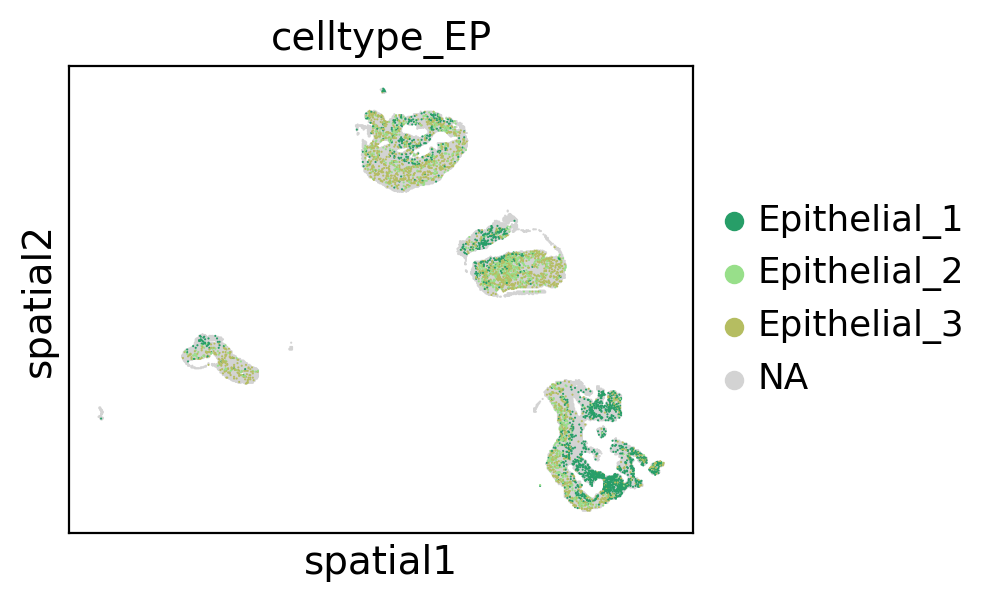

In [99]:
sc.settings.set_figure_params(dpi=100, facecolor='white')
adata.obs['celltype_EP']=np.nan
adata.obs.loc[adata.obs['cell2loc_anno']=='Epithelial_1','celltype_EP']='Epithelial_1'
adata.obs.loc[adata.obs['cell2loc_anno']=='Epithelial_2','celltype_EP']='Epithelial_2'
adata.obs.loc[adata.obs['cell2loc_anno']=='Epithelial_3','celltype_EP']='Epithelial_3'

color_anno_ep={
# "Cell_morphogenesis":'#1f77b4',
"Epithelial_1":'#279e68',
"Epithelial_2":'#98df8a',
"Epithelial_3":'#b5bd61',
# "Cuticle_1":'#d62728',
# "Cuticle_2":'#e377c2',
# "Cuticle_3":'#ff9896',
}
sc.pl.spatial(adata,color=["celltype_EP"],img_key="hires",
              palette=color_anno_ep,
              spot_size=50,save='WD2_celltype_EP.pdf')

In [100]:
adata.obs["celltype_EP"].value_counts()


celltype_EP
Epithelial_3    1904
Epithelial_1    1633
Epithelial_2     922
Name: count, dtype: int64

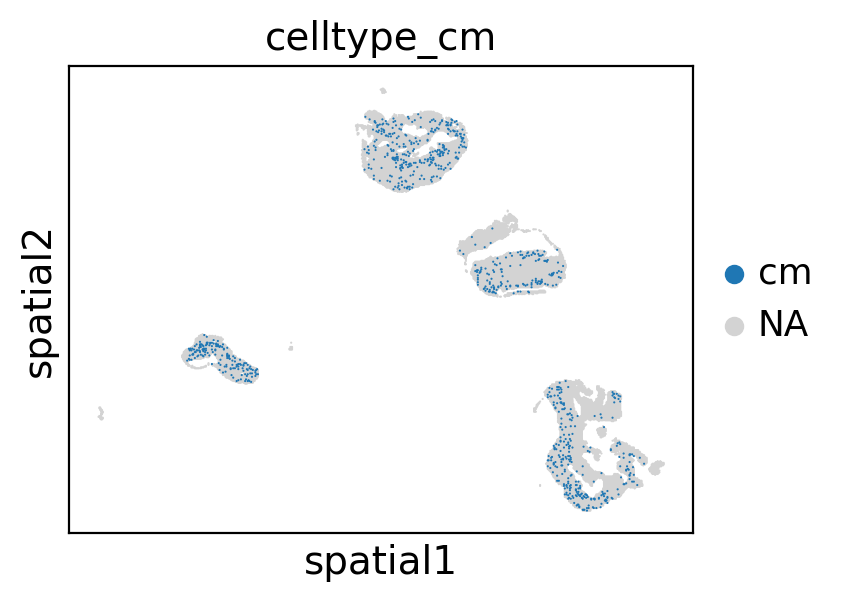

In [101]:
sc.settings.set_figure_params(dpi=100, facecolor='white')
adata.obs['celltype_cm']=np.nan
adata.obs.loc[adata.obs['cell2loc_anno']=='Cell_morphogenesis','celltype_cm']='cm'


color_anno_cm={
"cm":'#1f77b4'
}

sc.pl.spatial(adata,color=["celltype_cm"],img_key="hires",
               palette=color_anno_cm,
              spot_size=50,save='WD2_celltype_cm.pdf')

In [26]:
color_anno={
"Cell_morphogenesis":'#1f77b4',
"Epithelial_1":'#279e68',
"Epithelial_2":'#98df8a',
"Epithelial_3":'#b5bd61',
"Cuticle_1":'#d62728',
"Cuticle_2":'#e377c2',
"Cuticle_3":'#ff9896',
"Immune":'#f7b6d2',
"Apoptosis":'#aa40fc',
"Metabolic_process":'#c49c94',
"Axon_development":'#ffbb78',
"Ciliated_cell":'#ff7f0e'
}

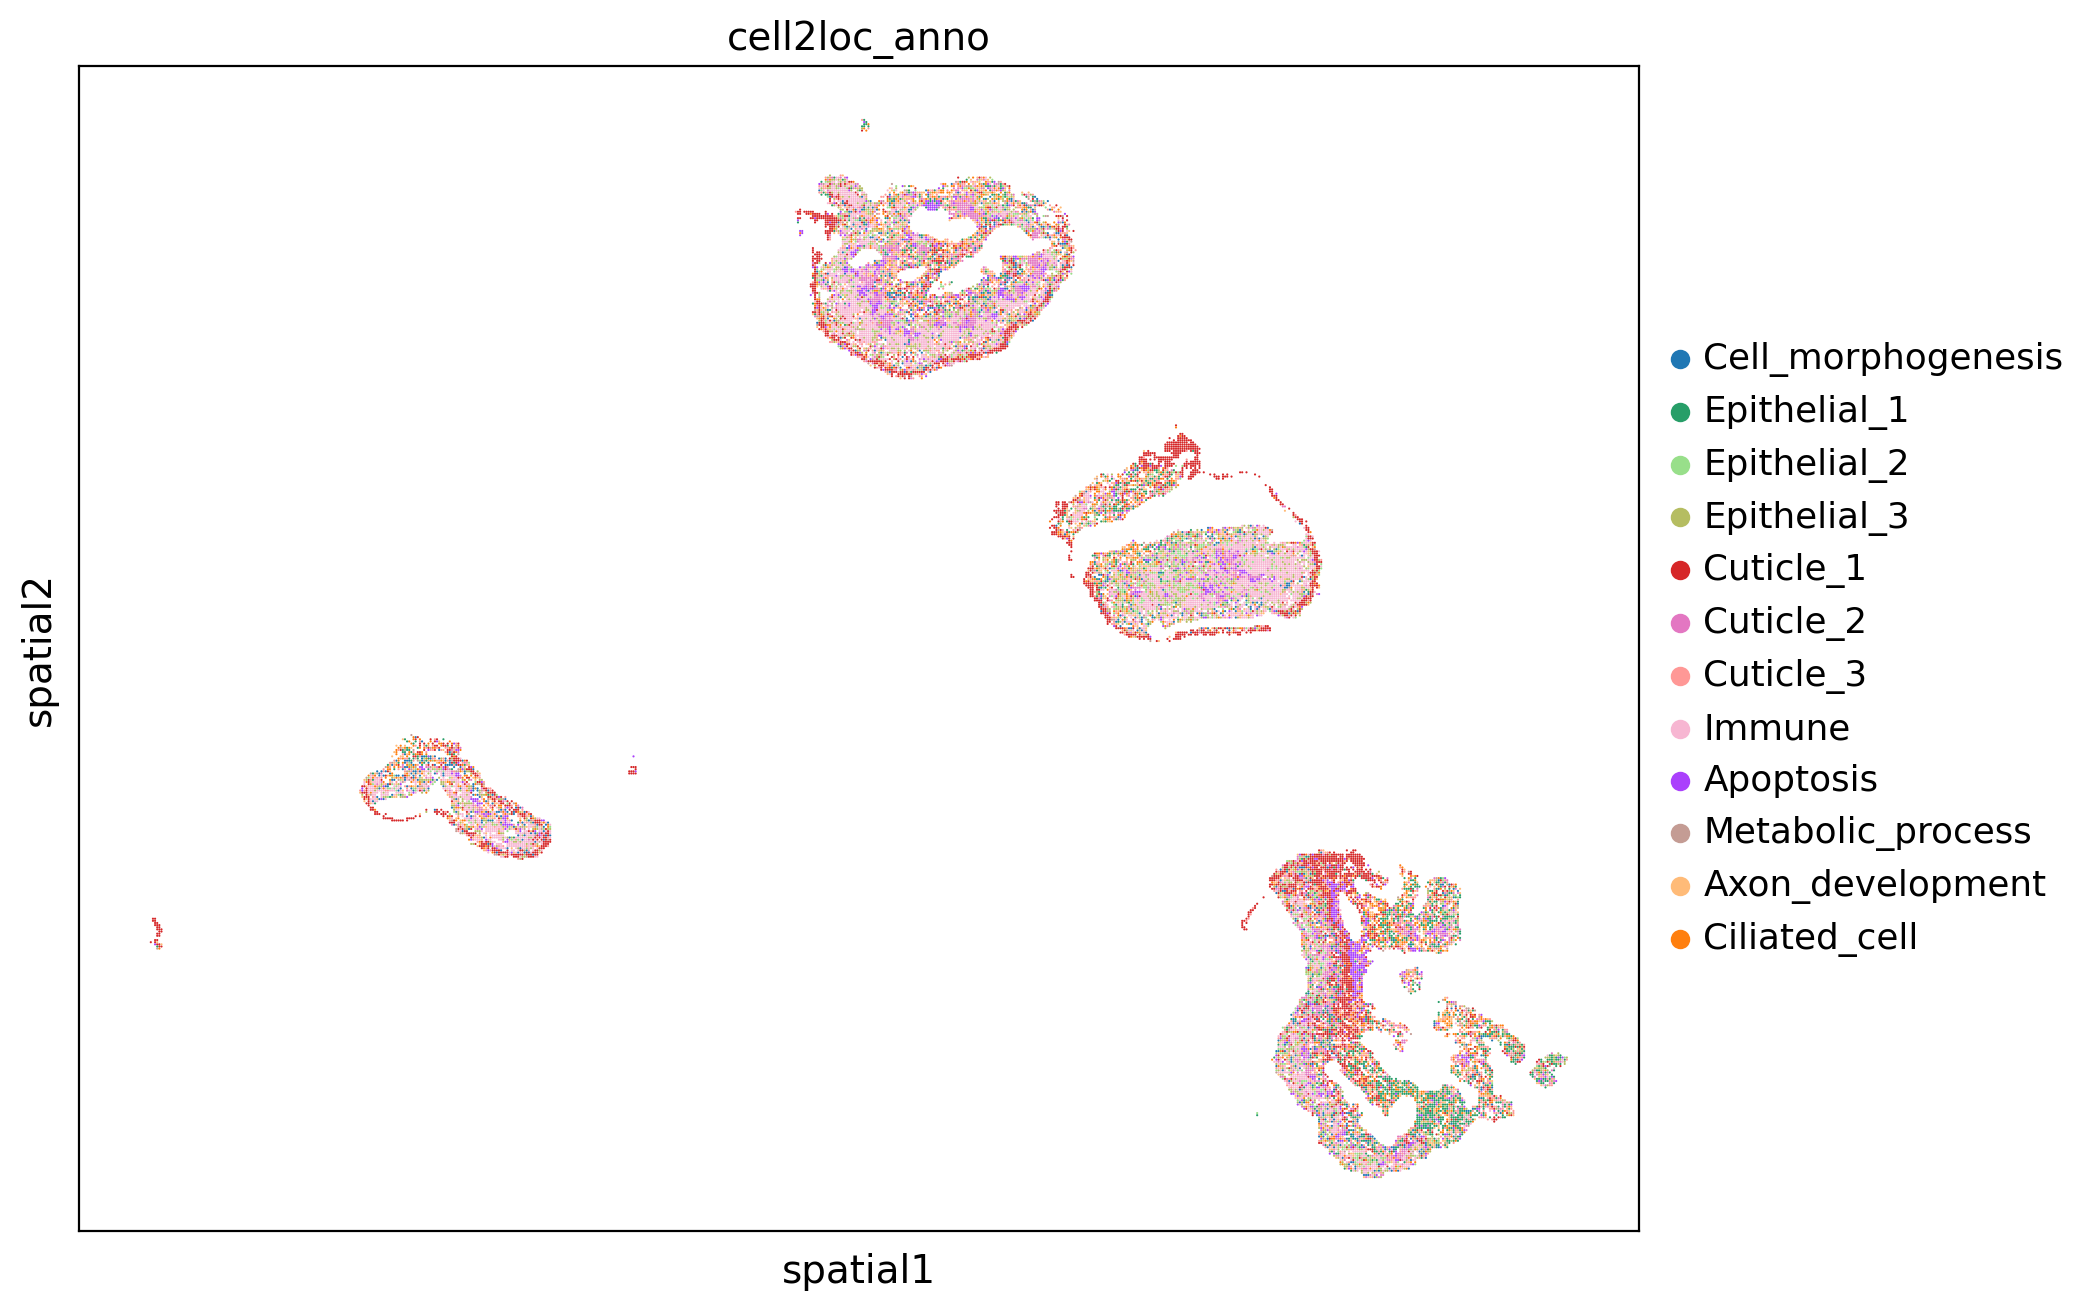

In [27]:
rcParams['figure.figsize'] = 10, 10
sc.pl.spatial(adata, img_key="hires", 
              color='cell2loc_anno', 
              palette=color_anno,
              spot_size=50,size=0.4,save=f"WD2_{anno}.pdf")
#Diameter of spot (in coordinate space) for each point,spot_size
#Point size,size

In [65]:
# adata.write_h5ad("plot.h5ad")

In [104]:
matrix=adata.to_df()
meta_data=adata.obs
matrix.to_csv('count.csv',index=True)
meta_data.to_csv('meta_data.csv',index=True)

In [105]:
cellsCount = adata.obs['cell2loc_anno'].value_counts()
cellsRate = cellsCount/cellsCount.sum()*100
cellsdf = pd.concat([cellsCount, cellsRate], axis=1)
cellsdf.columns = ['count', 'rate']
cellsdf.to_csv(f"{anno}_cell_count.tsv", sep="\t")

In [106]:
plt.figure(figsize=(12, 10))
cellsdf['count'].plot(kind = 'barh')
i = 0
sum = cellsdf['count'].sum()
for _, v in cellsdf['rate'].items():
    plt.text(sum*(v+2)/100, i, '%.2f' % v, ha='center', va='bottom', fontsize=11)
    i+=1
plt.savefig(f"WD2_{anno}_cell_count.pdf")
plt.clf()

<Figure size 1200x1000 with 0 Axes>

In [107]:

plotcol = 4
cells = adata.obs[anno].unique()
# cells=['Cell_junction', 'Cell_morphogenesis','Cuticle', 'Cuticle_early', 'Cuticle_late',
#                        'Epithelial_1',
# 'Epithelial_2',
# 'Epithelial_3',
# 'Eukaryocyte',
# 'Immune',
#  'Metabolic_process',
#   'Others', 'Phagocytes', 'Phosphorylation']
plotrow = math.ceil(len(cells)/plotcol)
figSize = (16, plotrow*4)
# cells

In [108]:
fig = plt.figure(figsize=figSize,dpi=100)
for j in tqdm(range(len(cells))):
    cell = cells[j]
    i = j+1
    row = int(i/plotcol)
    col = i - row*plotcol
    ax = plt.subplot(plotrow, plotcol, i)
    sc.pl.spatial(adata, img_key="hires", color=anno, 
                  groups = [cell], 
                  palette=color_anno,
                  spot_size=50,size=0.6,show=False, ax = ax, title ="{0} ({1})".format(cell, cellsCount.loc[cell]), legend_loc=None)
    ax.set_xlabel("")
    ax.set_ylabel("")
plt.savefig(f"WD2_{anno}_split.pdf")
plt.clf()

100%|██████████| 13/13 [00:25<00:00,  1.99s/it]


<Figure size 1600x1600 with 0 Axes>